Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Intial Data Inspection

Reading the Data

In [3]:
import pandas as pd
df = pd.read_csv('/content/ai_job_market_insights.csv')


df.head()- Gives the first five rows and columns

In [4]:
print(df.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

df.tail()- last rows and coloumns

In [5]:
print(df.tail())

                 Job_Title            Industry Company_Size Location  \
495         Data Scientist  Telecommunications       Medium   Berlin   
496  Cybersecurity Analyst  Telecommunications        Small   London   
497  Cybersecurity Analyst              Energy        Large    Dubai   
498     Operations Manager          Healthcare        Large    Paris   
499             HR Manager       Entertainment       Medium   Berlin   

    AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
495               Low          Medium    Machine Learning  105821.394046   
496               Low            High        UX/UI Design  119794.992146   
497              High             Low        UX/UI Design   79644.933099   
498              High             Low              Python   77642.150625   
499            Medium            High  Project Management   68764.378921   

    Remote_Friendly Job_Growth_Projection  
495             Yes                Stable  
496              No   

df.info()- gives information

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB
None


df.describe()- decribes the data

In [7]:
print(df.describe())

          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


df.isnull()- identify Missing Values

In [8]:
print(df.isnull())

     Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0        False     False         False     False              False   
1        False     False         False     False              False   
2        False     False         False     False              False   
3        False     False         False     False              False   
4        False     False         False     False              False   
..         ...       ...           ...       ...                ...   
495      False     False         False     False              False   
496      False     False         False     False              False   
497      False     False         False     False              False   
498      False     False         False     False              False   
499      False     False         False     False              False   

     Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  \
0              False            False       False            False   
1      

Handle Missing Data: Impute Missing Values: Fill missing values using strategies like mean, median, or mode imputation, or domain-specific methods.

checking for missing values

In [9]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


Categorical data analysis: Checking unique values in each column

In [10]:




for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())




Unique values in Job_Title:
Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

Unique values in Industry:
Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

Unique values in Company_Size:
Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

Unique values in Location:
Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto     

#UNIVARIATE ANALYSIS
#1.Distribution of Numerical coloumns

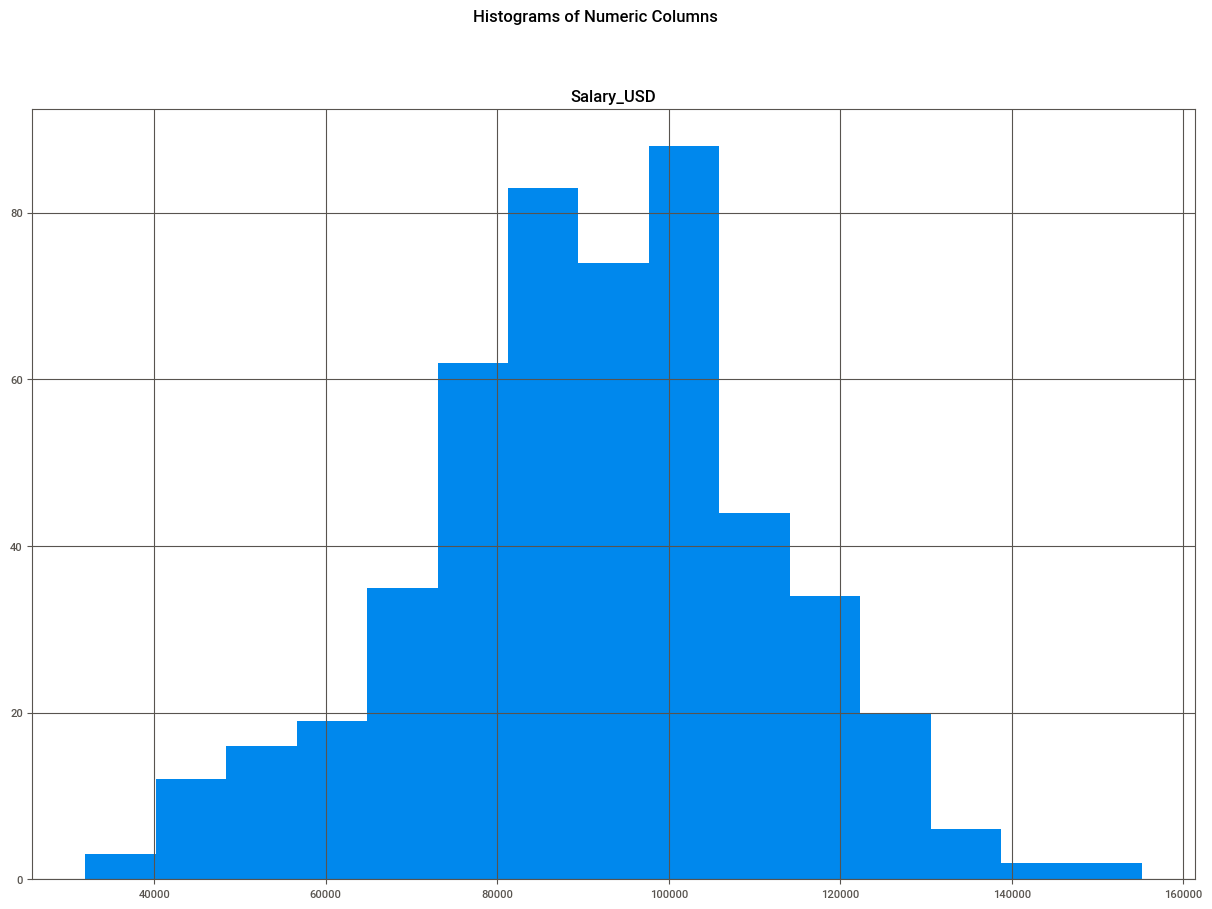

In [31]:
# Histograms for each numerical column
df.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()


# Visualizing the distribution of salaries

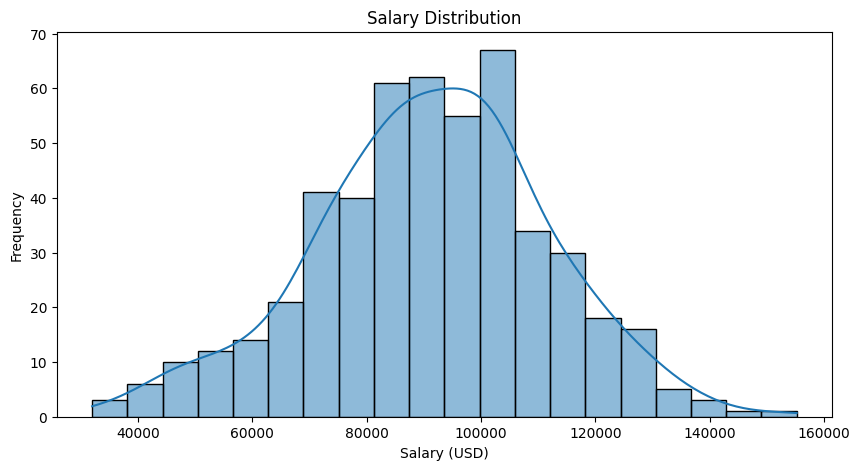

In [12]:




plt.figure(figsize=(10, 5))
sns.histplot(df['Salary_USD'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()



# Analyzing job titles by frequency

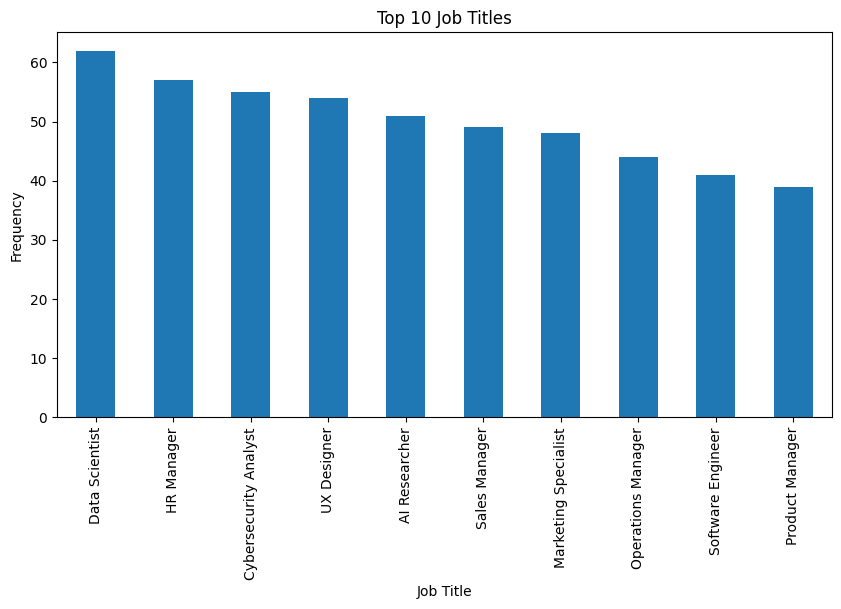

In [13]:

plt.figure(figsize=(10, 5))
df['Job_Title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.show()


# Exploring AI Adoption Levels

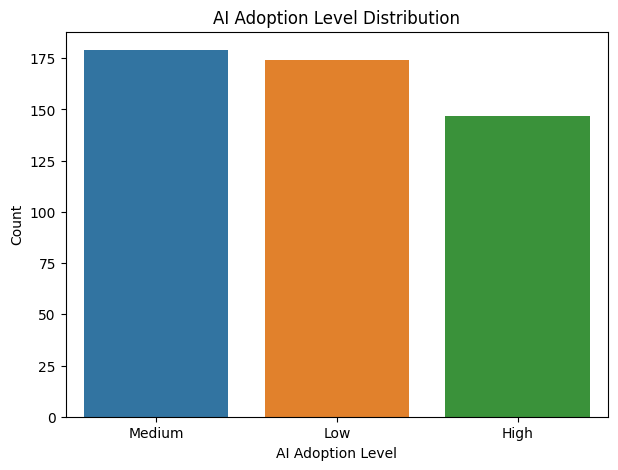

In [14]:

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='AI_Adoption_Level')
plt.title("AI Adoption Level Distribution")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.show()

#  Distribution of Job Locations

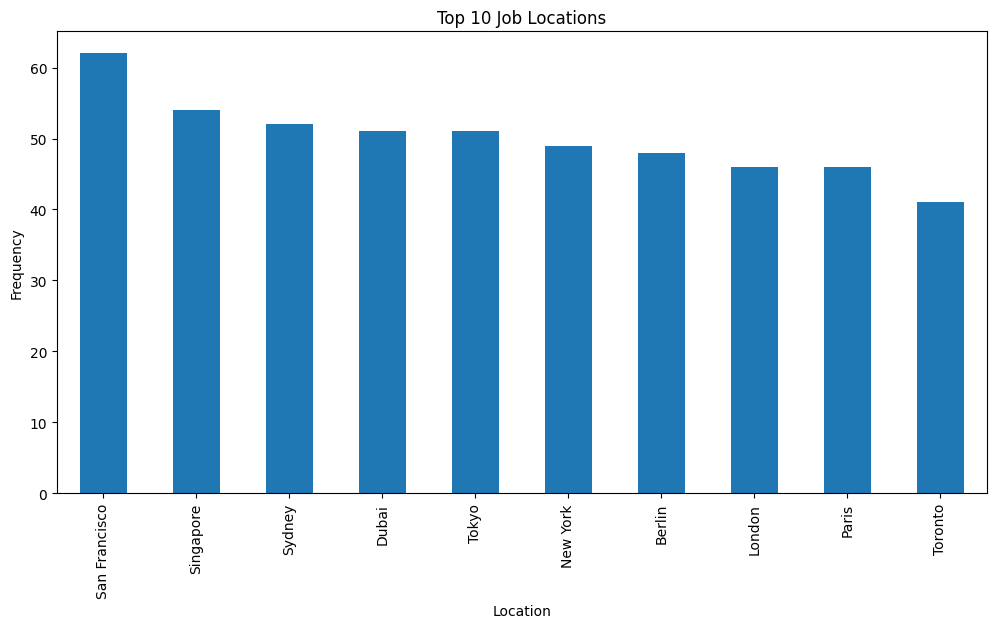

In [15]:

plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Job Locations")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()

#  Top Required Skills Analysis

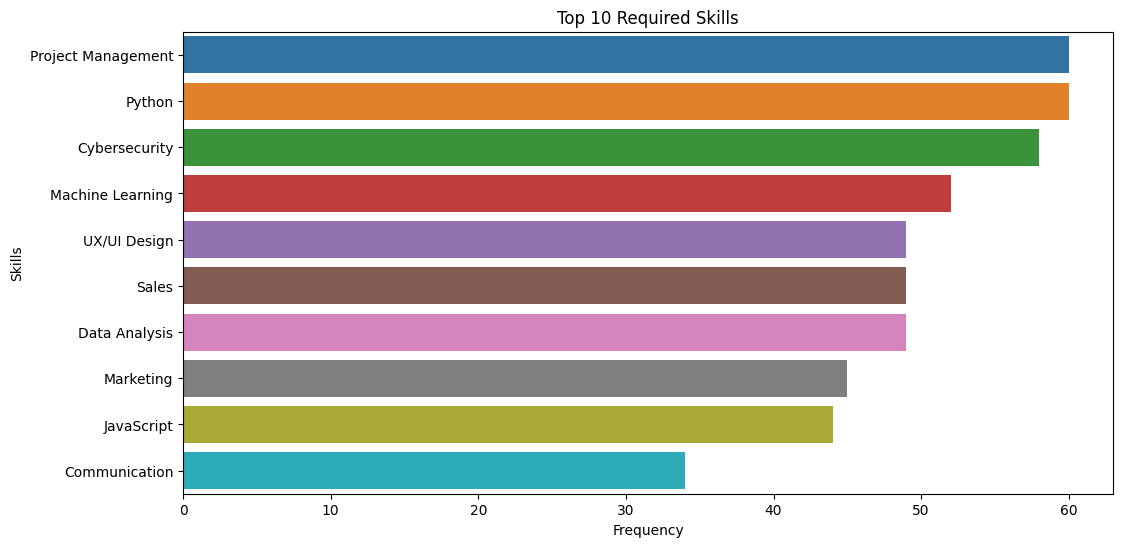

In [16]:

plt.figure(figsize=(12, 6))
top_skills = df['Required_Skills'].value_counts().head(10)
sns.barplot(y=top_skills.index, x=top_skills.values)
plt.title("Top 10 Required Skills")
plt.xlabel("Frequency")
plt.ylabel("Skills")
plt.show()


# Examining Automation Risk by AI Adoption Level

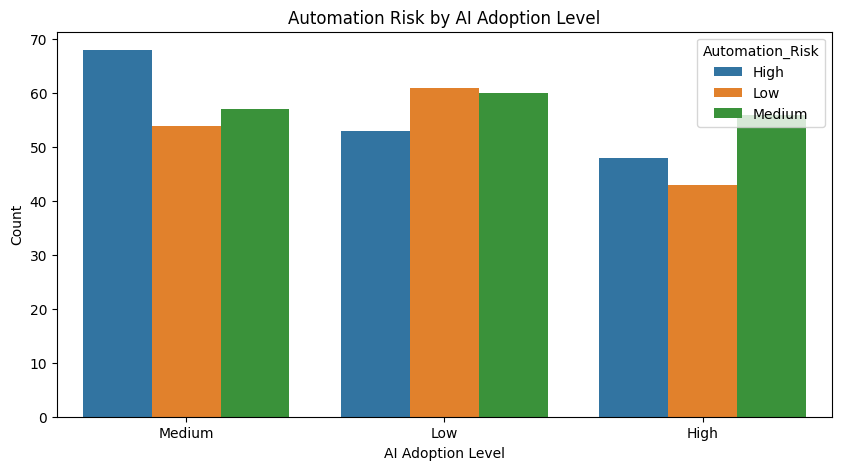

In [17]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Automation_Risk')
plt.title("Automation Risk by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.show()

# Remote friendliness distribution by company size

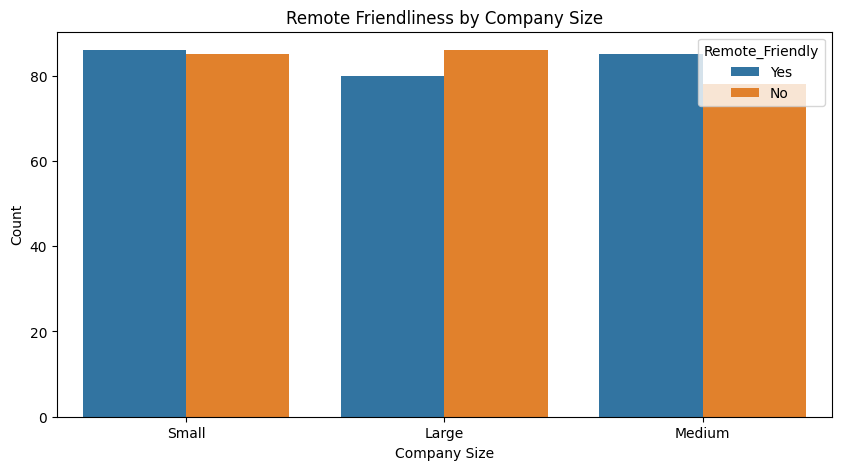

In [18]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Company_Size', hue='Remote_Friendly')
plt.title("Remote Friendliness by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

#examine Salary by Industry

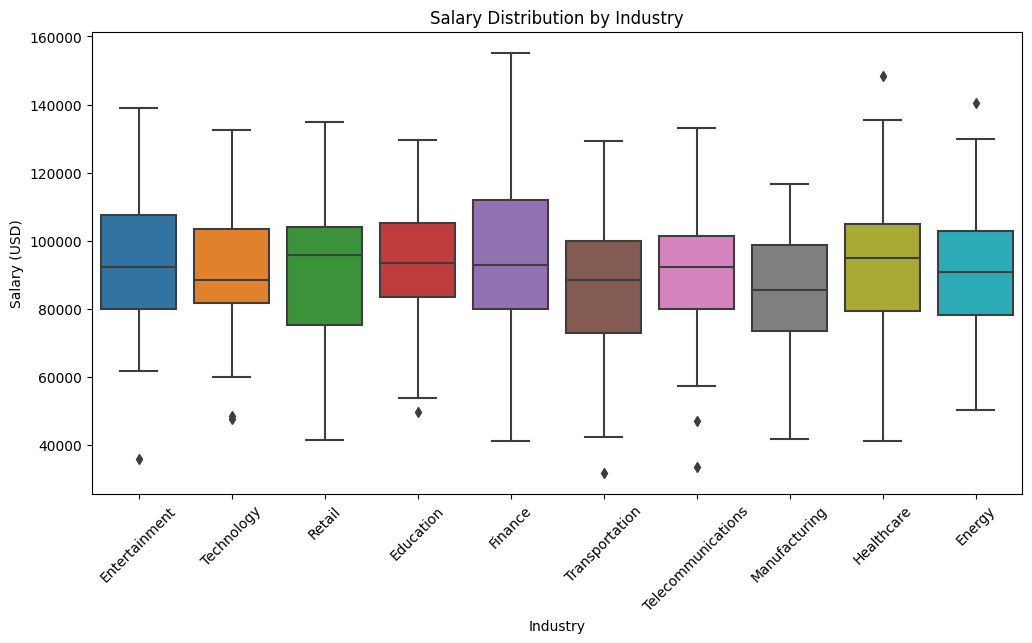

In [19]:
# Boxplot to examine Salary by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Industry', y='Salary_USD')
plt.xticks(rotation=45)
plt.title("Salary Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Salary (USD)")
plt.show()

#job growth projection by industry

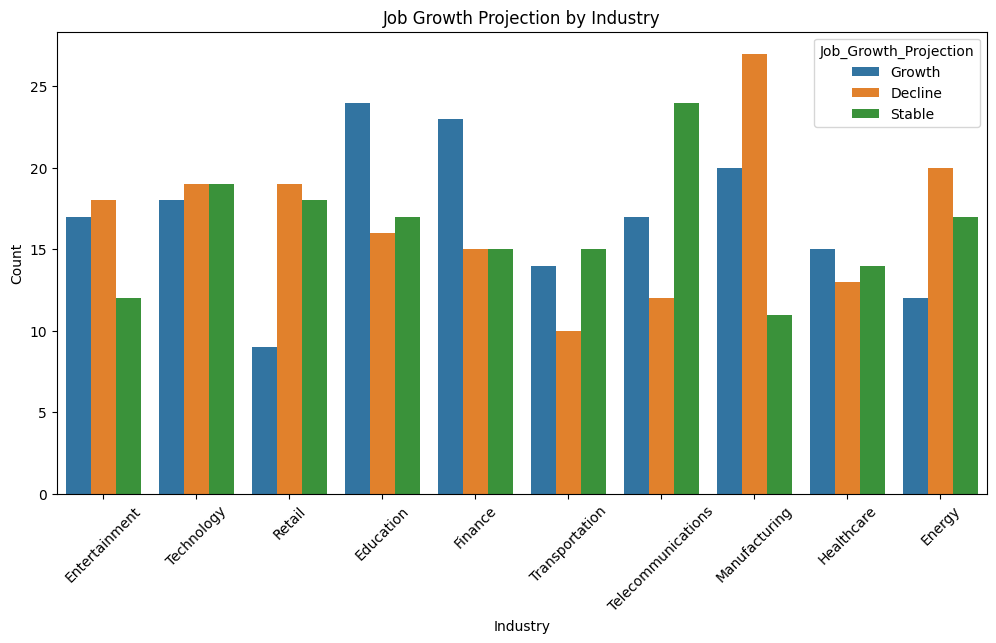

In [20]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Industry', hue='Job_Growth_Projection')
plt.title("Job Growth Projection by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Salary Distribution by Automation Risk

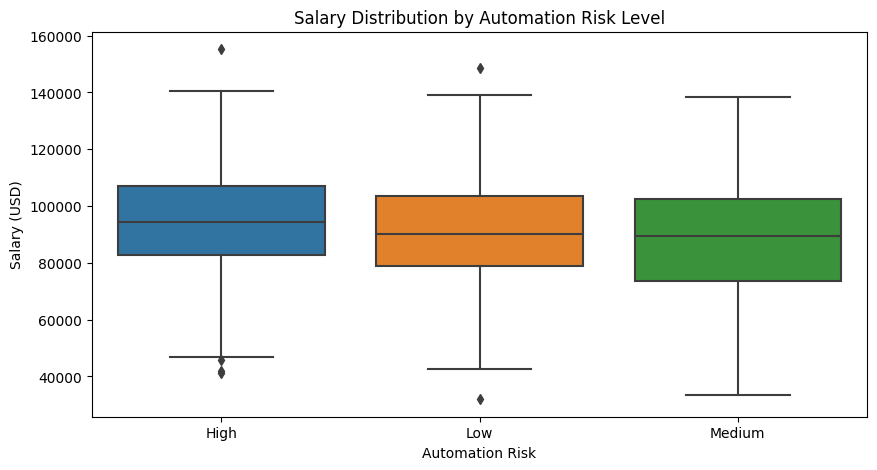

In [21]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Automation_Risk', y='Salary_USD')
plt.title("Salary Distribution by Automation Risk Level")
plt.xlabel("Automation Risk")
plt.ylabel("Salary (USD)")
plt.show()

#  Relationship between Required Skills and Salary

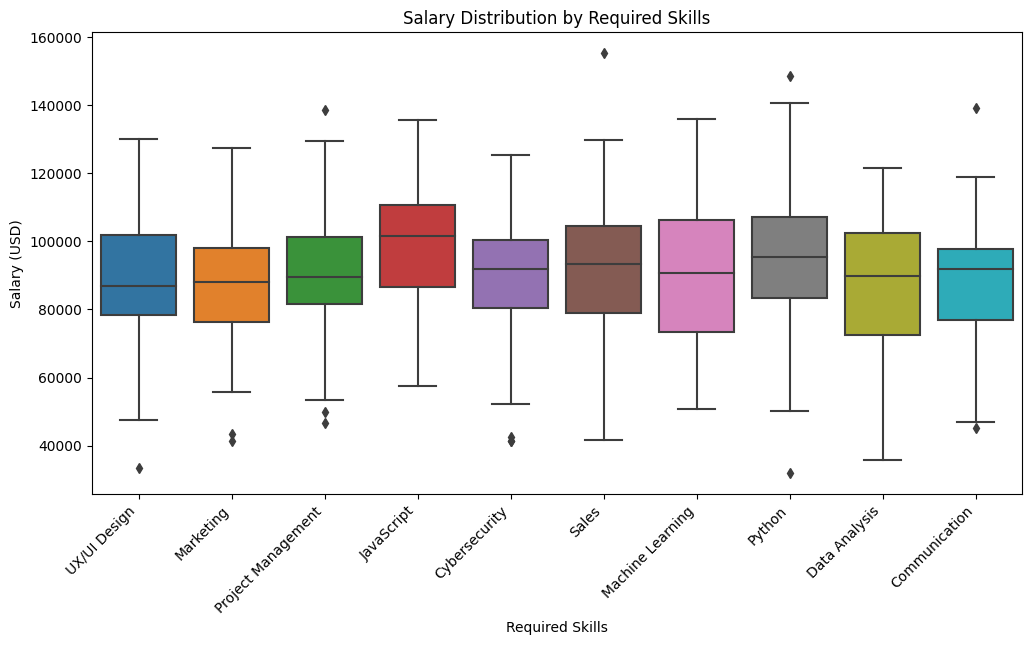

In [22]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Required_Skills', y='Salary_USD')
plt.xticks(rotation=45, ha='right')
plt.title("Salary Distribution by Required Skills")
plt.xlabel("Required Skills")
plt.ylabel("Salary (USD)")
plt.show()

#BIVARIATE ANALYSIS
#Interaction between Salary, AI Adoption Level, and Automation RisK

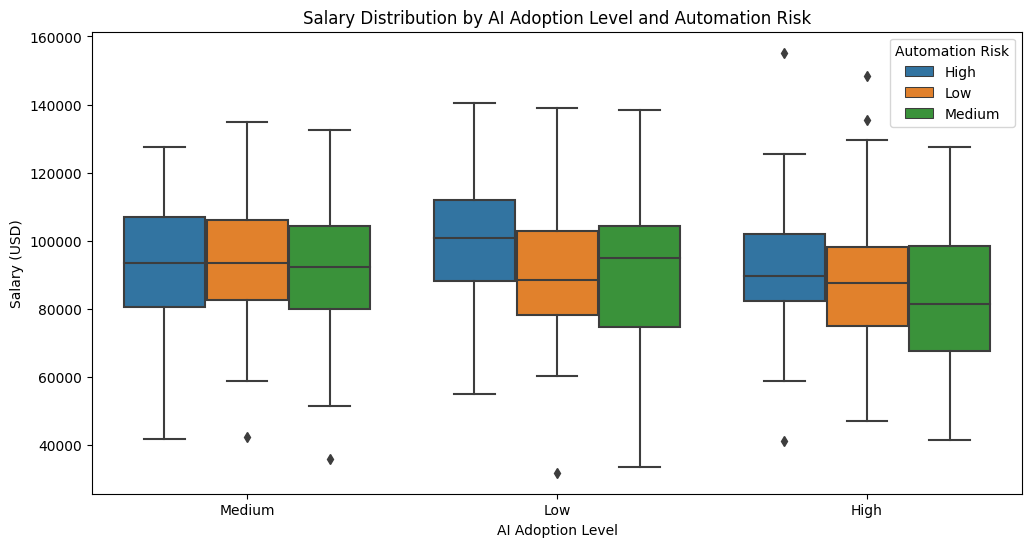

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AI_Adoption_Level', y='Salary_USD', hue='Automation_Risk')
plt.title("Salary Distribution by AI Adoption Level and Automation Risk")
plt.xlabel("AI Adoption Level")
plt.ylabel("Salary (USD)")
plt.legend(title='Automation Risk')
plt.show()


# Pivot table for heatmap analysis

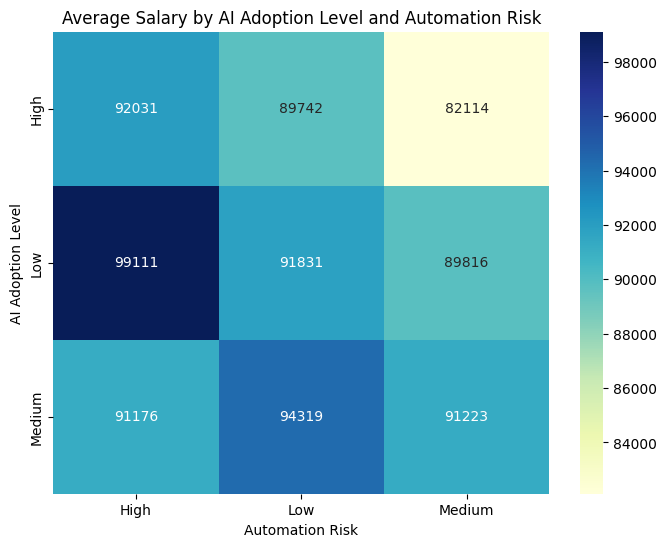

In [24]:

heatmap_data = df.pivot_table(index='AI_Adoption_Level', columns='Automation_Risk', values='Salary_USD', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Salary by AI Adoption Level and Automation Risk")
plt.xlabel("Automation Risk")
plt.ylabel("AI Adoption Level")
plt.show()


#Job Growth Projection by Automation Risk and Industry

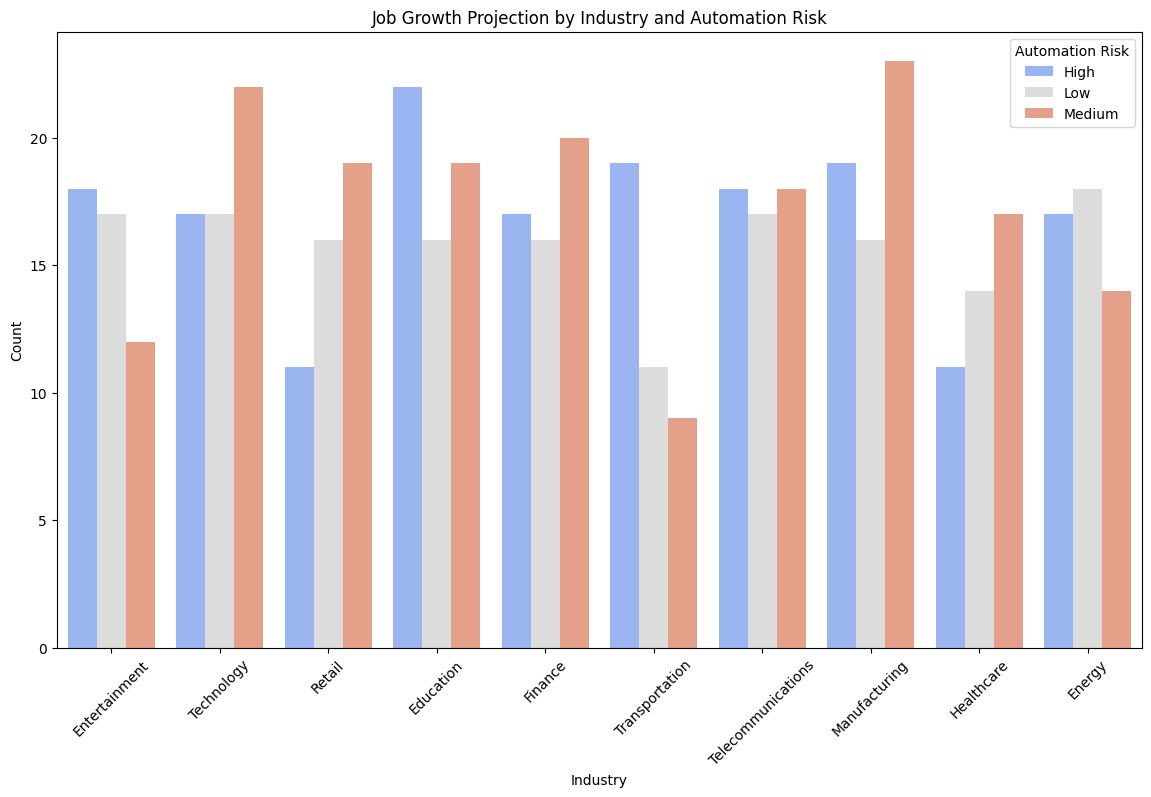

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Industry', hue='Automation_Risk', palette="coolwarm")
plt.title("Job Growth Projection by Industry and Automation Risk")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Automation Risk')
plt.show()


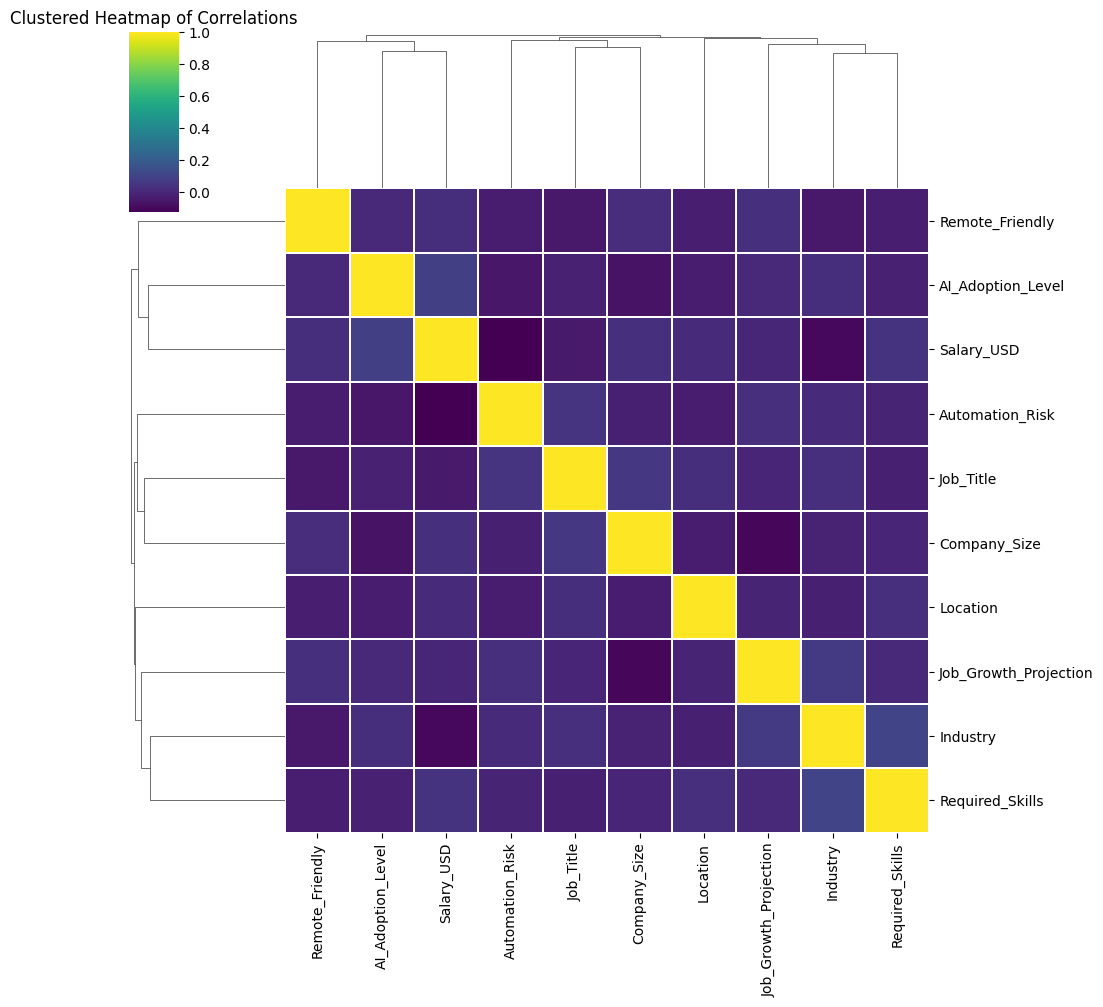

In [27]:
# Cluster heatmap
sns.clustermap(df.corr(), cmap="viridis", linewidths=0.1, figsize=(10, 10))
plt.title("Clustered Heatmap of Correlations")
plt.show()


#Data Profiling

#SWEETVIZ

                                             |          | [  0%]   00:00 -> (? left)


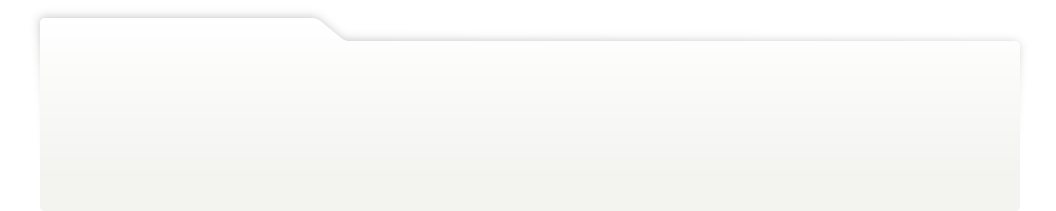
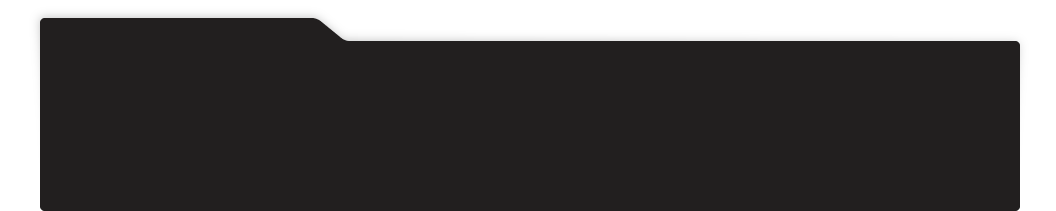
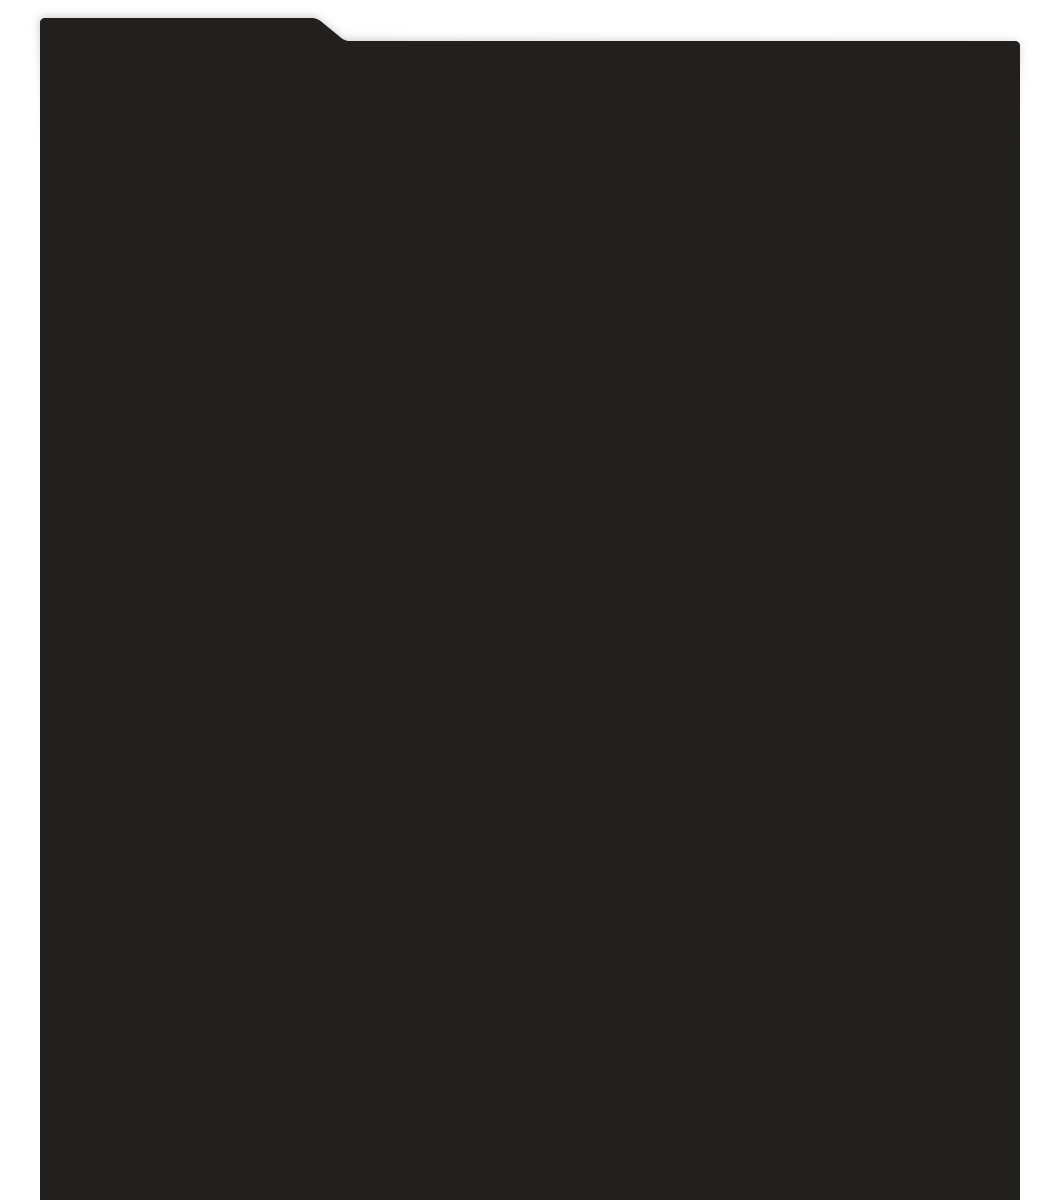
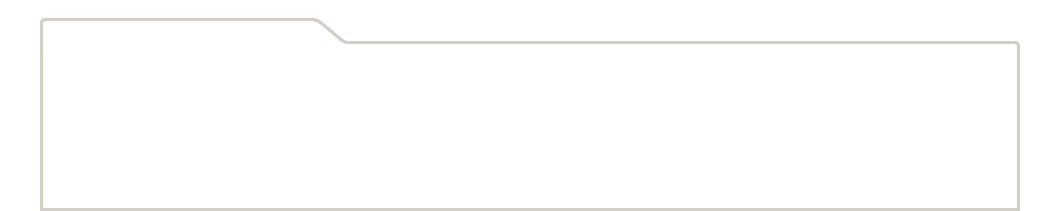
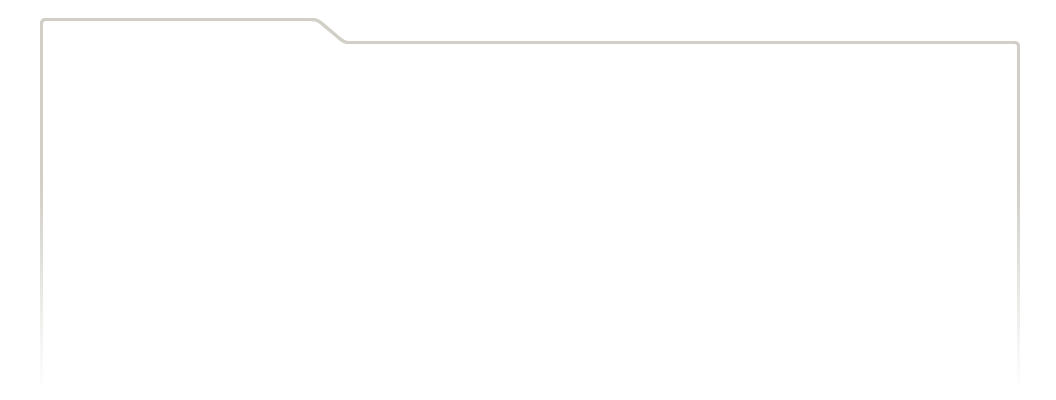
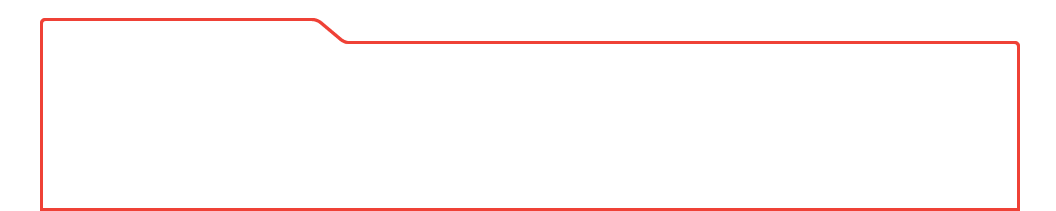
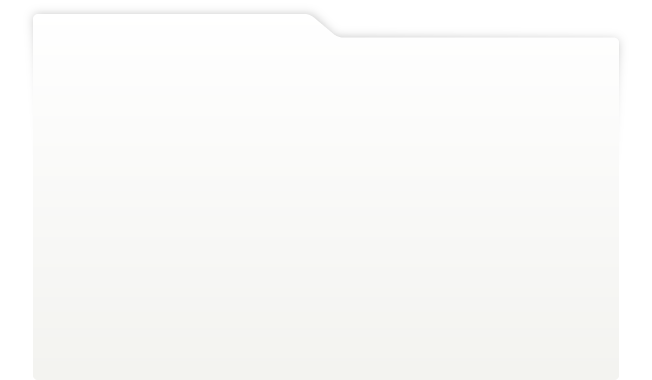
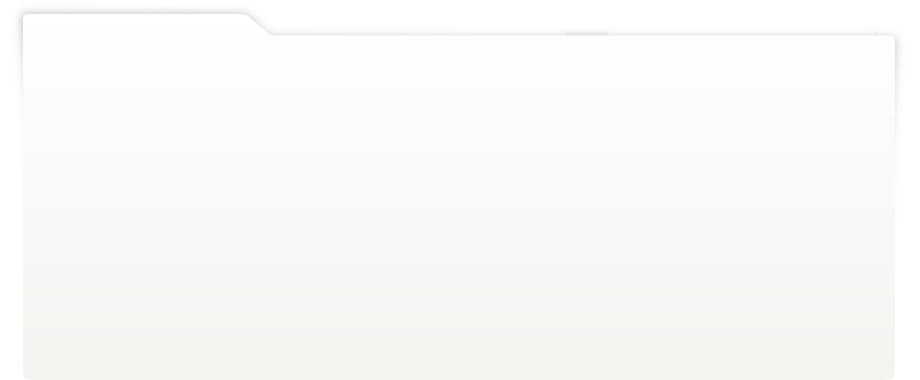
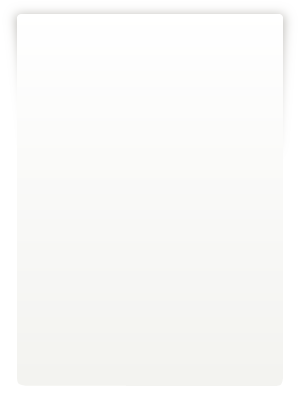
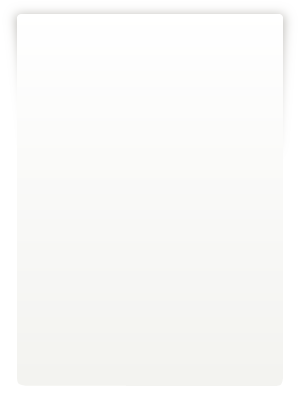
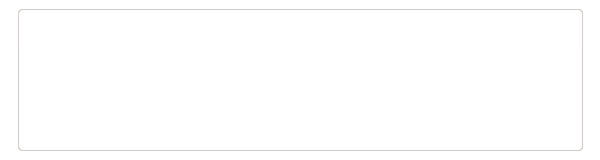
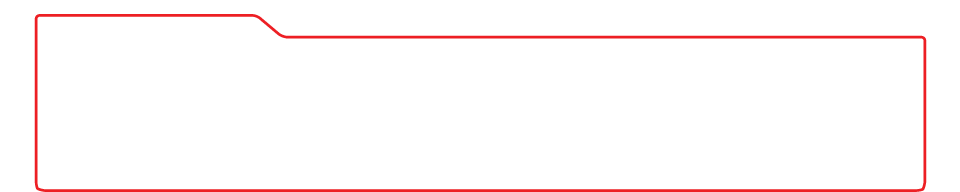
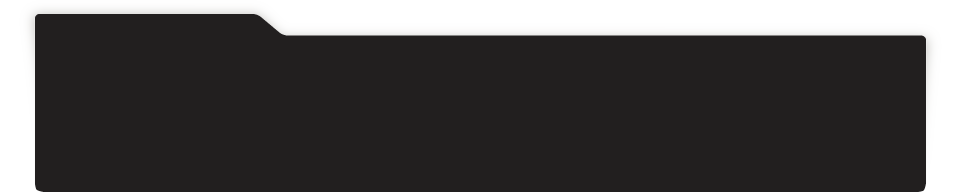
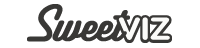
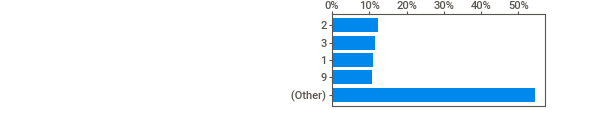
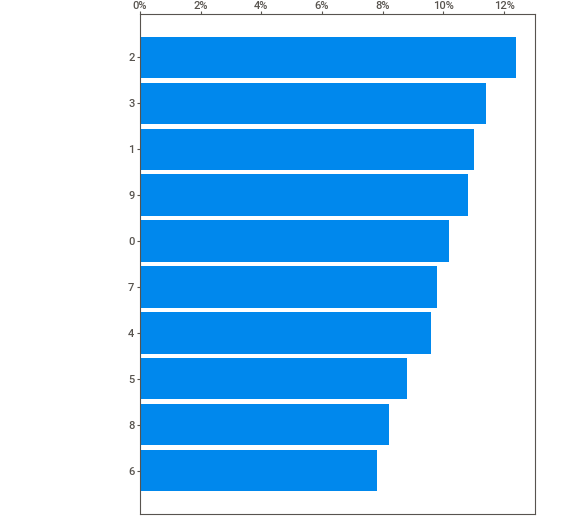
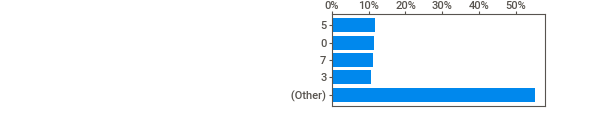
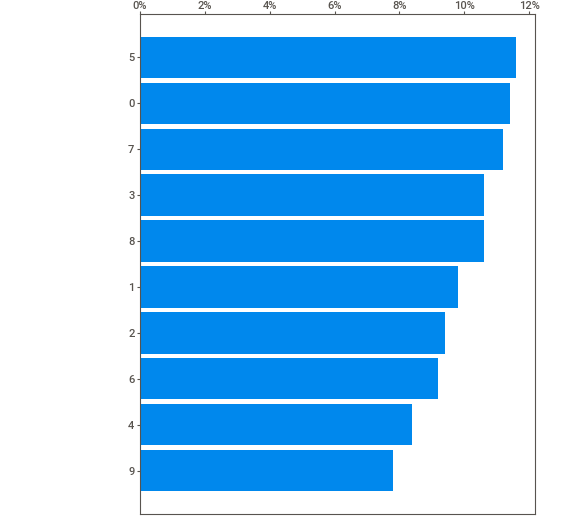
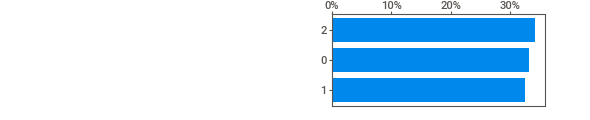
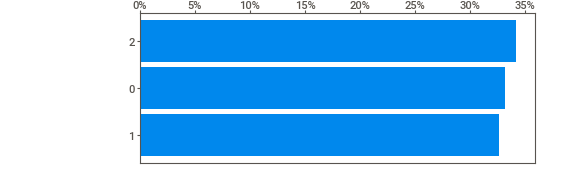
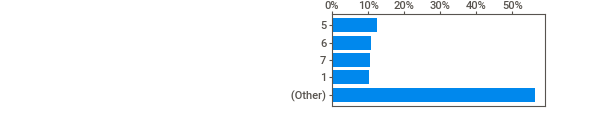
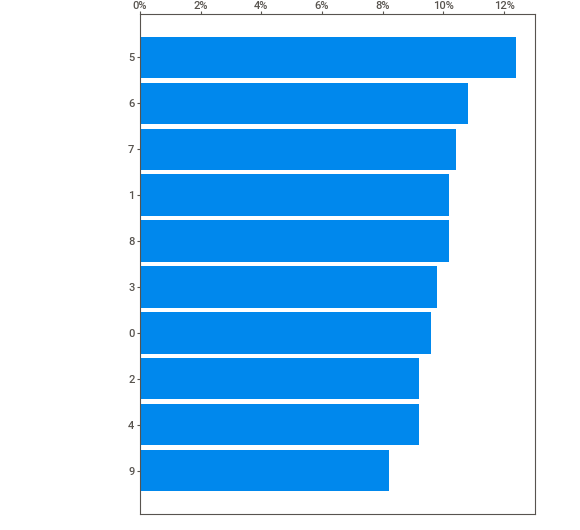
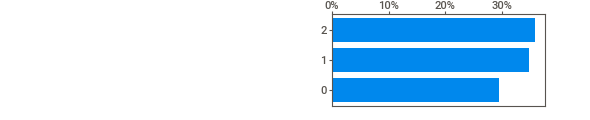
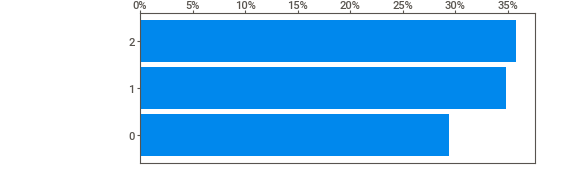
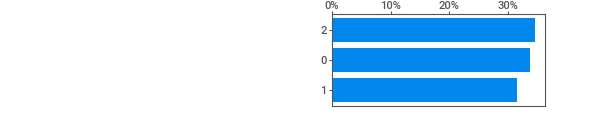
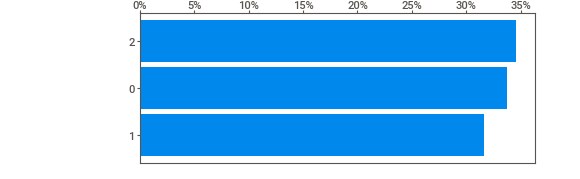
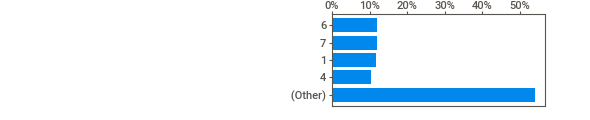
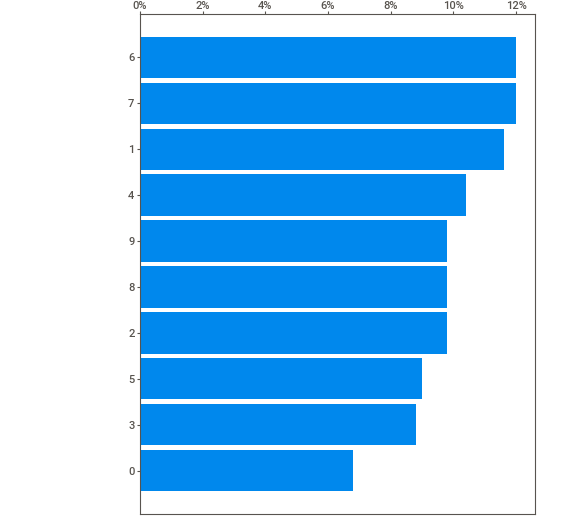
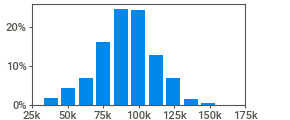
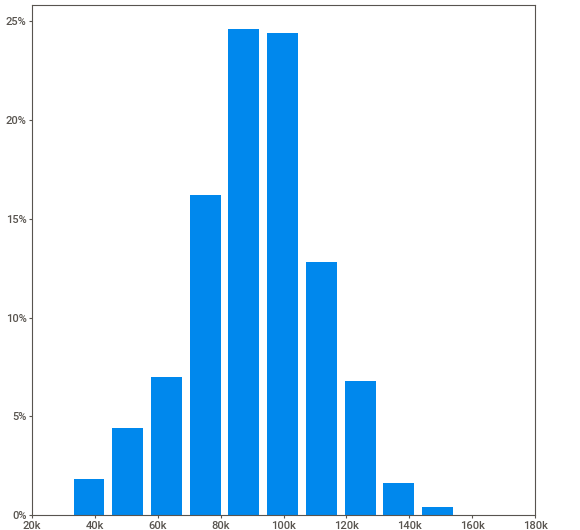
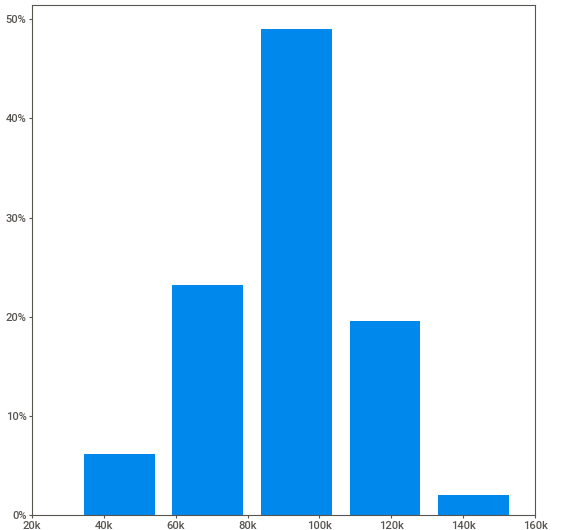
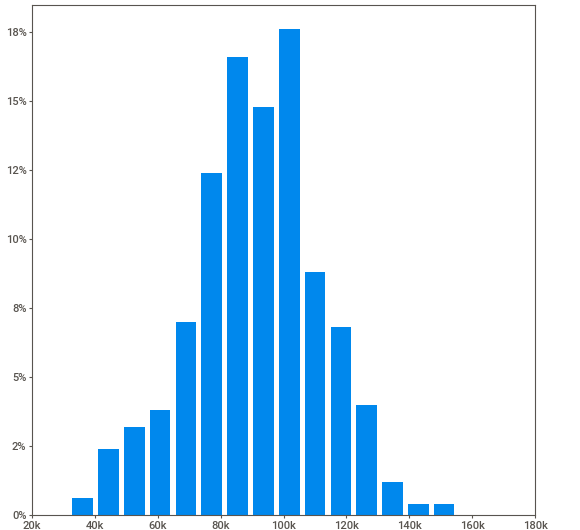
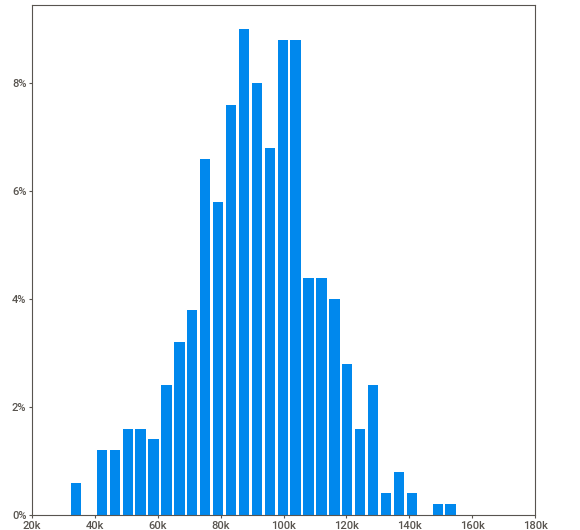
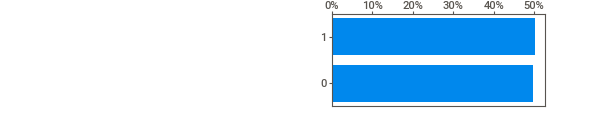
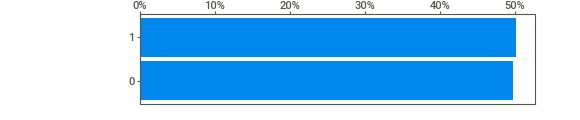
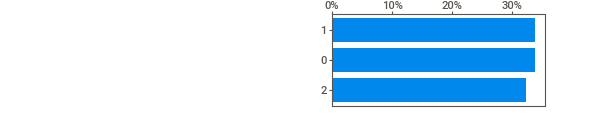
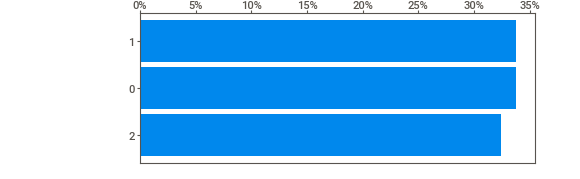
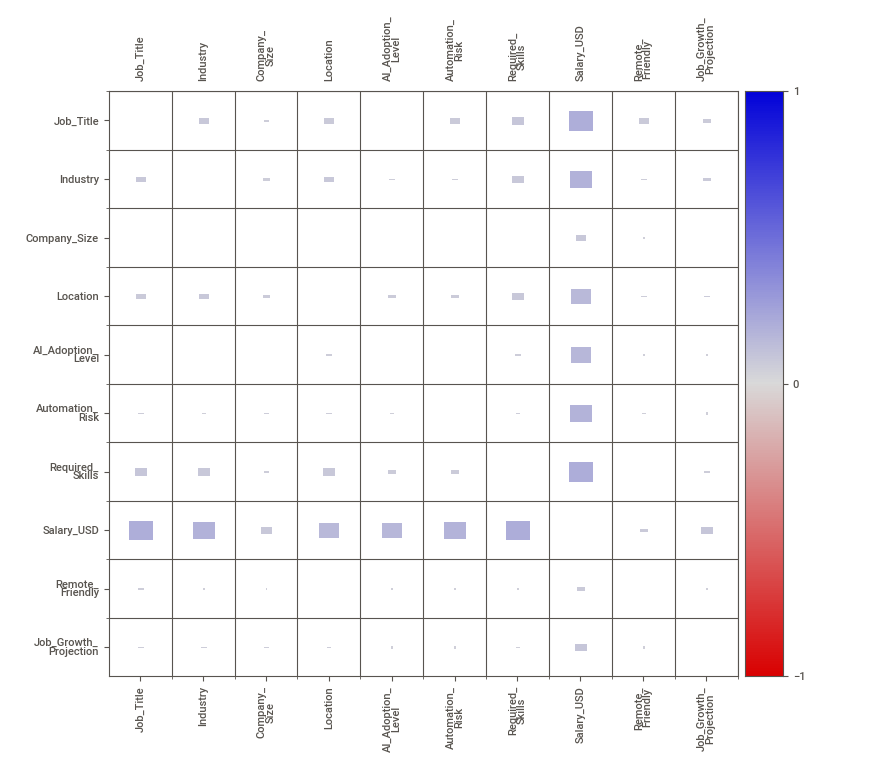
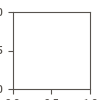

Report ai_job_market_insights_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
# Install Sweetviz if needed
!pip install sweetviz

import sweetviz as sv

# Generate the Sweetviz report
sweetviz_report = sv.analyze(df)

# Display the report in the notebook
sweetviz_report.show_notebook()

# Save the report as an HTML file
sweetviz_report.show_html("ai_job_market_insights_sweetviz_report.html")


#Pandas Profiling

In [30]:
# Install the required version of pydantic and pandas-profiling
!pip install pydantic==1.10.8 pandas-profiling

from pandas_profiling import ProfileReport

# Load the dataset if not already loaded
import pandas as pd
file_path = '/content/ai_job_market_insights.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Generate the profile report
profile = ProfileReport(df, title="AI Job Market Insights - Pandas Profiling Report", explorative=True)

# Display the report within the Jupyter Notebook
profile.to_notebook_iframe()

# Save the report as an HTML file for later viewing
profile.to_file("ai_job_market_insights_pandas_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]